<a href="https://colab.research.google.com/github/SecureIoT-Systems/docs/blob/master/Copy_of_Copy_of_vehicle_communication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start

In [5]:
from google.colab import drive
drive.mount('./gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at ./gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import os
import subprocess
import random
import pickle

In [0]:
drive_path = os.path.join('/content/drive/My Drive/IOV_Thesis/')
data_path = os.path.join(drive_path,'veremi_database.p')
cp_path = os.path.join(drive_path,'ae_weights.h5')
csv_path = os.path.join(drive_path,'train_log.csv')
best_path = os.path.join(drive_path,'ae_weights(99.2).h5')
inf_path = os.path.join(drive_path,'inf.p')

## Create Database

In [0]:
!wget 'https://github.com/VeReMi-dataset/VeReMi/archive/v1.0.zip'

In [0]:
!unzip 'v1.0.zip'

In [0]:
files = os.listdir('/content/VeReMi-1.0/securecomm2018/')

In [0]:
for i in range(len(files)):
    if(files[i]=='extract-index.sh'):
        files.pop(i)
        break

In [0]:
for i in tqdm(range(len(files))):
    os.popen('wget https://github.com/VeReMi-dataset/VeReMi/releases/download/v1.0/'+files[i])

In [0]:
for i in tqdm(range(len(files))):
    subprocess.call(['tar','-xvf',files[i]])

In [0]:
# fig,ax = plt.subplots(1,1)
# ctr = 0
# for i in tqdm(range(len(files))):
#     folder_path = os.path.join('work/ul/ul_vertsys/ul_wqy57/',files[i][:-4],'veins-maat/simulations/securecomm2018/results/')
#     gt_path = os.path.join(folder_path,'GroundTruthJSONlog.json')
#     try:
#         ground_truth = pd.read_json(gt_path,lines=True)
#     except:
#         continue
#     ground_truth = ground_truth[['messageID','sender','attackerType','time']]
#     ls = os.listdir(folder_path)
#     ls = set(ls)
#     rem = set()
#     for x in ls:
#         if(x[0]!='J'):
#             rem.add(x)
#     for x in rem:
#         ls.remove(x)
#     df = pd.DataFrame()
#     flag = False
#     for x in ls:
#         json_path = os.path.join(folder_path,x)
#         try:
#             data = pd.read_json(json_path,lines=True)
#             data = data[data['type']==3]
#             data = data[['messageID','pos','spd']]
#         except:
#             continue
#         if(len(df)==0):
#             df = ground_truth.merge(data,on='messageID')
#         else:
#             df = pd.concat([df,ground_truth.merge(data,on='messageID')])
#     ctr+=1
#     df = df.iloc[df.astype(str).drop_duplicates().index]
#     df = df.reset_index(drop=True)
#     data_norm = df[df['attackerType'].isin(set([0]))]
#     X = list(map(lambda x:x[0],list(data_norm['pos'].values)))
#     Y = list(map(lambda x:x[1],list(data_norm['pos'].values)))
#     ax.scatter(X,Y,s=1,color='k',alpha=0.05)
#     att = df['attackerType'].unique()
#     if(1 in att):
#         color = 'r'
#     elif(2 in att):
#         color = 'b'
#     elif(4 in att):
#         color = 'g'
#     elif(8 in att):
#         color = 'c'
#     elif(16 in att):
#         color = 'y'
#     data_att = df[~df['attackerType'].isin(set([0]))]
#     X_att = list(map(lambda x:x[0],list(data_att['pos'].values)))
#     Y_att = list(map(lambda x:x[1],list(data_att['pos'].values)))
#     ax.scatter(X_att,Y_att,s=1,color=color,alpha=0.1)
# fig.dpi = 300
# ax.set_xlim(2000,7000)
# ax.set_ylim(4900,6200)
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# fig.tight_layout()
# print(ctr)

In [0]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [0]:
database = {}
database[0] = set()
for i in range(5):
    database[2**i] = set()
seq_len = 24
for i in tqdm(range(len(files))):
    folder_path = os.path.join('work/ul/ul_vertsys/ul_wqy57/',files[i][:-4],'veins-maat/simulations/securecomm2018/results/')
    gt_path = os.path.join(folder_path,'GroundTruthJSONlog.json')
    try:
        ground_truth = pd.read_json(gt_path,lines=True)
    except:
        continue
    ground_truth = ground_truth[['messageID','sender','attackerType','time']]
    ls = os.listdir(folder_path)
    ls = set(ls)
    rem = set()
    for x in ls:
        if(x[0]!='J'):
            rem.add(x)
    for x in rem:
        ls.remove(x)
    df = pd.DataFrame()
    ctr = 0
    for x in ls:
        json_path = os.path.join(folder_path,x)
        try:
            data = pd.read_json(json_path,lines=True)
            data = data[data['type']==3]
            data = data[['messageID','pos','spd']]
        except:
            continue
        if(len(df)==0):
            df = ground_truth.merge(data,on='messageID')
        else:
            df = pd.concat([df,ground_truth.merge(data,on='messageID')])
    df = df.drop_duplicates(subset='messageID', keep="first")
    df = df.reset_index(drop=True)
    senders = df['sender'].unique()
    df_att = df[['sender','attackerType']].drop_duplicates().set_index('sender')
    for s in senders:
        att = df_att.loc[s]['attackerType']
        snd = df[df['sender']==s]
        snd = snd[['pos','spd','time']]
        snd = snd.sort_values(by=['time'])
        ln = len(snd)
        for i in range(0,100-seq_len,seq_len//2):
            if(ln<(i+10)):
                break
            seq = tuple(map(lambda x:tuple(x[0]+x[1]),snd.iloc[i:i+seq_len].values))
            database[att].add(seq)

In [0]:
for key,val in database.items():
    print(key,len(val))

0 30947
1 2712
2 2746
4 5644
8 5664
16 4951


In [0]:
database[32] = set()
ctr = 0
for x in database[0]:
    database[32].add(x)
    ctr+=1
    if(ctr==2947):
        break
for x in database[32]:
    database[0].remove(x)

In [0]:
for key,val in database.items():
    print(key,len(val))

0 28000
1 2712
2 2746
4 5644
8 5664
16 4951
32 2947


In [0]:
key_ln = [0 for i in range(6)]
key_ln[0] = 30947.
key_ln[1] = 2712
key_ln[2] = 2746
key_ln[3] = 5644
key_ln[4] = 5664
key_ln[5] = 4951
summ_ln = sum(key_ln)
ratio = [key_ln[i]/summ_ln for i in range(6)]
print(ratio)

[0.587631019292116, 0.05149627829257178, 0.052141880601549444, 0.10716998329029317, 0.10754974935439769, 0.09401108916907185]


In [0]:
with open(data_path,'wb') as f:
    pickle.dump(database,f,protocol=pickle.HIGHEST_PROTOCOL)

## Load Database

In [0]:
with open(data_path,'rb') as f:
    database = pickle.load(f)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Generators

In [0]:
def train_generator(batch_size,st=database[0],seq_len=24):
    while True:
        train_sample = random.sample(st,batch_size)
        train_sample = list(map(lambda x:list(map(lambda y:[y[0]/1e3,y[1]/1e3,y[3],y[4]],x))+[[0 for _ in range(4)] for __ in range(seq_len-len(x))],train_sample))
        train_sample = np.array(train_sample)
        yield train_sample,train_sample[:,:,:2]

In [0]:
def test_generator(batch_size,ratio=[0.5,0.1,0.1,0.1,0.1,0.1],seq_len=24):
    global database
    while True:
        ln = [int(batch_size*ratio[i]) for i in range(6)]
        ln[0]+=batch_size-sum(ln)
        test_sample = random.sample(database[32],ln[0])
        test_sample = list(map(lambda x:list(map(lambda y:[y[0]/1e3,y[1]/1e3,y[3],y[4]],x))+[[0 for _ in range(4)] for __ in range(seq_len-len(x))],test_sample))
        Y = [0 for i in range(ln[0])]
        for i in range(5):
            temp = random.sample(database[2**i],ln[i+1])
            temp = list(map(lambda x:list(map(lambda y:[y[0]/1e3,y[1]/1e3,y[3],y[4]],x))+[[0 for _ in range(4)] for __ in range(seq_len-len(x))],temp))
            test_sample = test_sample + temp
            Y = Y + [2**i for _ in range(ln[i+1])]
        test_sample = np.array(test_sample)
        Y = np.array(Y)
        yield test_sample,Y

### Testing generators

In [0]:
X,_ = next(train_generator(1000))
print(X.shape)

(1000, 24, 4)


In [0]:
def mag(x,y):
    return (x**2+y**2)**0.5

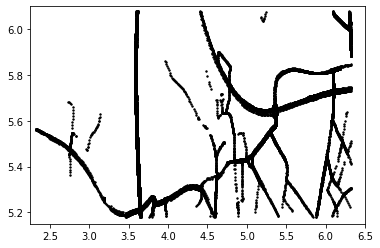

In [0]:
# ind = 3
for ind in range(1000):
    plt.scatter(X[ind,:,0],X[ind,:,1],color='k',s=2)
plt.xlim(2.25,6.5)
plt.ylim(5.15,6.1)
plt.show()
# plt.plot(range(seq_len),X[ind,:,0],color='k')
# plt.show()
# plt.plot(range(seq_len),X[ind,:,1],color='k')
# plt.show()
# plt.plot(range(seq_len),[mag(X[ind,k,2],X[ind,k,3]) for k in range(seq_len)],color='k')
# plt.show()

In [0]:
def train_generator_custom(batch_size,set=database[0],seq_len=24):
    while True:
        train_sample = random.sample(database[0],batch_size)
        train_sample_x = list(map(lambda x:np.array(list(map(lambda y:[y[0]/1e3,y[1]/1e3,y[3],y[4]],x))),train_sample))
        train_sample_y = list(map(lambda x:np.array(list(map(lambda y:[y[0]/1e3,y[1]/1e3],x))),train_sample))
        train_sample_x = np.array(train_sample_x)
        train_sample_y = np.array(train_sample_y)
        yield train_sample_x,train_sample_y

In [0]:
X,_ = next(train_generator_custom(1000))
print(X.shape)

(1000,)


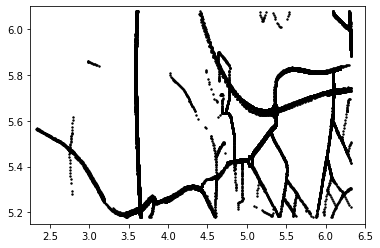

In [0]:
for ind in range(1000):
    plt.scatter(X[ind][:,0],X[ind][:,1],color='k',s=2)
plt.xlim(2.25,6.5)
plt.ylim(5.15,6.1)
plt.show()

In [0]:
X,Y = next(test_generator(2048))
print(X.shape)
print(Y.shape)

(2048, 24, 4)
(2048,)


In [0]:
def test_generator_custom(batch_size,ratio=[0.5,0.1,0.1,0.1,0.1,0.1],seq_len=24):
    global database
    while True:
        ln = [int(batch_size*ratio[i]) for i in range(6)]
        ln[0]+=batch_size-sum(ln)
        test_sample = random.sample(database[32],ln[0])
        test_sample = list(map(lambda x:np.array(list(map(lambda y:[y[0]/1e3,y[1]/1e3,y[3],y[4]],x))),test_sample))
        Y = [0 for i in range(ln[0])]
        for i in range(5):
            temp = random.sample(database[2**i],ln[i+1])
            temp = list(map(lambda x:np.array(list(map(lambda y:[y[0]/1e3,y[1]/1e3,y[3],y[4]],x))),temp))
            test_sample = test_sample + temp
            Y = Y + [2**i for _ in range(ln[i+1])]
        test_sample = np.array(test_sample)
        Y = np.array(Y)
        yield test_sample,Y

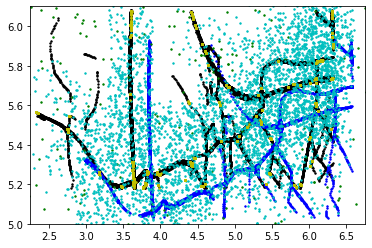

In [0]:
col_dic = {0:'k',1:'r',2:'b',4:'g',8:'c',16:'y',32:'k'}
for ind in range(len(X)):
    plt.scatter(X[ind,:,0],X[ind,:,1],color=col_dic[Y[ind]],s=2)
plt.xlim(2.25,6.75)
plt.ylim(5,6.1)
plt.show()

In [0]:
X,Y = next(test_generator(64,[1,0,0,0,0,0]))
print(X.shape)
print(Y.shape)

(64, 24, 4)
(64,)


In [0]:
fig,ax = plt.subplots(1,1)
col_dic = {0:'k',1:'r',2:'b',4:'g',8:'c',16:'y',32:'k'}
for i in tqdm(range(6)):
    for x in database[2**i]:
        x = np.array(x)
        ax.scatter(x[:,0],x[:,1],s=2,color=col_dic[key])
fig.dpi = 300
ax.set_xlim(2000,7000)
ax.set_ylim(4900,6200)
ax.set_xlabel('X')
ax.set_ylabel('Y')
fig.tight_layout()

## Deep Learning

In [3]:
!pip install livelossplot
!pip install keras-rectified-adam

  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.17.0-cp36-none-any.whl size=14781 sha256=58a2d44d87121a1e97dd9f9775b579c77f68522a155632b2ef65dc1669e5b8c7
  Stored in directory: /root/.cache/pip/wheels/7b/01/27/3a934e1a5644f5b93c720422a6ef97034ea78a21ba71cfb549
Successfully built keras-rectified-adam


### GPU

In [0]:
import keras
from keras.layers import Input,CuDNNGRU,CuDNNLSTM,GRU,LSTM,Dense,Bidirectional,SimpleRNN
from keras.models import Model
from livelossplot import PlotLossesKeras
from keras.optimizers import Adam
from keras.regularizers import l1,l2
from sklearn.metrics import ConfusionMatrixDisplay
from keras_radam import RAdam
from tqdm.notebook import tqdm

In [0]:
batch_size = 1024*2
val_batch_size = 512
steps_per_epoch = 8
val_steps = 8
epochs = 10000
lr = 1e-6
opt = Adam(lr)

In [0]:
def get_model(units=[256,256,256,256],num_layers=4,seq_len=24,seq_width=4):
    inpt = Input((seq_len,seq_width))
    x = SimpleRNN(units[0],activation='relu',return_sequences=True,unroll=True)(inpt)
    for i in range(num_layers-1):
        x = SimpleRNN(units[i+1],activation='relu',return_sequences=True,unroll=True)(x)
    out = Dense(seq_width//2,activation='relu')(x)
    model = Model(inpt,out)
    return model

In [0]:
model = get_model()

In [15]:
model.load_weights(cp_path)

ValueError: ignored

In [16]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 24, 4)             0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 24, 256)           66816     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 24, 256)           131328    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 24, 256)           131328    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 24, 256)           131328    
_________________________________________________________________
dense_1 (Dense)              (None, 24, 2)             514       
Total params: 461,314
Trainable params: 461,314
Non-trainable params: 0
_____________________________________________________

In [0]:
cp = keras.callbacks.ModelCheckpoint(cp_path,monitor='loss',save_best_only=True)
es = keras.callbacks.EarlyStopping(monitor='loss',patience=2000,restore_best_weights=True)
csv = keras.callbacks.CSVLogger(csv_path)

In [0]:
model.compile(optimizer=opt,
              loss='mae',
              metrics=['mse'])

In [19]:
history = model.fit_generator(generator=train_generator(batch_size),
                              epochs=epochs,
                              steps_per_epoch=steps_per_epoch,
                              validation_data = train_generator(val_batch_size,st=database[32]),
                              validation_steps=val_steps,
                              callbacks=[cp,csv,es],
                              verbose=2)

Streaming output truncated to the last 5000 lines.
Epoch 7501/10000
 - 2s - loss: 0.0189 - mse: 0.0016 - val_loss: 0.0203 - val_mse: 0.0017
Epoch 7502/10000
 - 2s - loss: 0.0188 - mse: 0.0016 - val_loss: 0.0200 - val_mse: 0.0018
Epoch 7503/10000
 - 2s - loss: 0.0190 - mse: 0.0016 - val_loss: 0.0194 - val_mse: 0.0017
Epoch 7504/10000
 - 2s - loss: 0.0191 - mse: 0.0016 - val_loss: 0.0196 - val_mse: 0.0018
Epoch 7505/10000
 - 2s - loss: 0.0188 - mse: 0.0016 - val_loss: 0.0196 - val_mse: 0.0017
Epoch 7506/10000
 - 2s - loss: 0.0188 - mse: 0.0016 - val_loss: 0.0204 - val_mse: 0.0017
Epoch 7507/10000
 - 2s - loss: 0.0188 - mse: 0.0016 - val_loss: 0.0188 - val_mse: 0.0017
Epoch 7508/10000
 - 2s - loss: 0.0190 - mse: 0.0016 - val_loss: 0.0203 - val_mse: 0.0018
Epoch 7509/10000
 - 2s - loss: 0.0190 - mse: 0.0016 - val_loss: 0.0200 - val_mse: 0.0017
Epoch 7510/10000
 - 2s - loss: 0.0187 - mse: 0.0016 - val_loss: 0.0199 - val_mse: 0.0017
Epoch 7511/10000
 - 2s - loss: 0.0192 - mse: 0.0017 - val_l

In [0]:
log = pd.read_csv(csv_path)

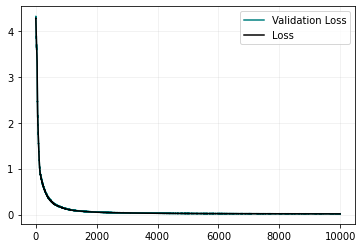

In [21]:
plt.figure()
plt.plot(log['val_loss'],color='teal')
plt.plot(log['loss'],color='k')
plt.legend(['Validation Loss','Loss'])
plt.grid(alpha=0.2)
plt.show()

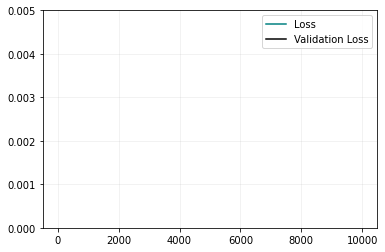

In [22]:
plt.figure()
plt.plot(log['val_loss'],color='teal')
plt.plot(log['loss'],color='k')
plt.legend(['Loss','Validation Loss'])
plt.grid(alpha=0.2)
plt.ylim(0,0.005)
plt.show()

In [23]:
print(min(log['loss']))
print(np.argmin(log['loss']))

0.01602154818829149
9954


### TPU

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input,GRU,LSTM,Dense,Bidirectional
from tensorflow.keras.models import Model
from livelossplot import PlotLossesKeras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1,l2
from sklearn.metrics import ConfusionMatrixDisplay
from keras_radam import RAdam
from tqdm.notebook import tqdm

Using TensorFlow backend.


In [0]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://'+os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)

INFO:tensorflow:Initializing the TPU system: grpc://10.74.184.2:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.74.184.2:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [0]:
batch_size = 1024*16*2
val_batch_size = 512
steps_per_epoch = 8
val_steps = 8
epochs = 8000
lr = 1e-3
opt = Adam(lr)

In [0]:
def get_model(batch_size,units=256,num_layers=4,seq_len=24,seq_width=4):
    inpt = Input((seq_len,seq_width),batch_size=batch_size)
    x = LSTM(units,activation='relu',return_sequences=True)(inpt)
    for i in range(num_layers-1):
        x = LSTM(units,activation='relu',return_sequences=True)(x)
    out = Dense(seq_width//2,activation='relu')(x)
    model = Model(inpt,out)
    return model

In [0]:
with strategy.scope():
    model = get_model(batch_size)
    model.compile(optimizer=opt,loss=tf.keras.losses.MeanAbsoluteError(),metrics=['mse'])

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(4096, 24, 4)]           0         
_________________________________________________________________
lstm (LSTM)                  (4096, 24, 256)           267264    
_________________________________________________________________
lstm_1 (LSTM)                (4096, 24, 256)           525312    
_________________________________________________________________
lstm_2 (LSTM)                (4096, 24, 256)           525312    
_________________________________________________________________
lstm_3 (LSTM)                (4096, 24, 256)           525312    
_________________________________________________________________
dense (Dense)                (4096, 24, 2)             514       
Total params: 1,843,714
Trainable params: 1,843,714
Non-trainable params: 0
___________________________________________________

In [0]:
loss = []
mse = []
min_loss = float('inf')
for epoch in tqdm(range(epochs)):
    x,y = next(train_generator(batch_size//2))
    history = model.fit(x,y,batch_size=batch_size//2,epochs=1,verbose=2)
    loss.extend(history.history['loss'])
    mse.extend(history.history['mse'])
    if(loss[-1]<min_loss):
        min_loss = loss[-1]
        model.save_weights('best_model.h5')

Streaming output truncated to the last 5000 lines.
1/1 - 0s - mse: 0.0025 - loss: 0.0386
1/1 - 0s - mse: 0.0021 - loss: 0.0341
1/1 - 0s - mse: 0.0027 - loss: 0.0436
1/1 - 0s - mse: 0.0016 - loss: 0.0293
1/1 - 0s - mse: 0.0046 - loss: 0.0585
1/1 - 0s - mse: 0.0032 - loss: 0.0478
1/1 - 0s - mse: 0.0039 - loss: 0.0488
1/1 - 0s - mse: 0.0041 - loss: 0.0510
1/1 - 0s - mse: 0.0021 - loss: 0.0353
1/1 - 0s - mse: 0.0026 - loss: 0.0390
1/1 - 0s - mse: 0.0023 - loss: 0.0387
1/1 - 0s - mse: 0.0016 - loss: 0.0297
1/1 - 0s - mse: 0.0031 - loss: 0.0451
1/1 - 0s - mse: 0.0015 - loss: 0.0288
1/1 - 0s - mse: 0.0052 - loss: 0.0605
1/1 - 0s - mse: 0.0040 - loss: 0.0516
1/1 - 0s - mse: 0.0025 - loss: 0.0399
1/1 - 0s - mse: 0.0026 - loss: 0.0418
1/1 - 0s - mse: 0.0021 - loss: 0.0368
1/1 - 0s - mse: 0.0015 - loss: 0.0299
1/1 - 0s - mse: 0.0046 - loss: 0.0560
1/1 - 0s - mse: 0.0039 - loss: 0.0496
1/1 - 0s - mse: 0.0022 - loss: 0.0374
1/1 - 0s - mse: 0.0020 - loss: 0.0356
1/1 - 0s - mse: 0.0028 - loss: 0.0437

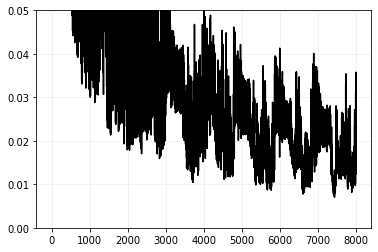

In [0]:
plt.plot(loss,color='k')
plt.grid(alpha=0.2)
plt.ylim(0,0.05)
plt.show()

In [0]:
min_loss

0.007043363526463509

### Visualise

In [0]:
X,Y = next(test_generator(2048))
col_dic = {0:'k',1:'r',2:'b',4:'g',8:'c',16:'y'}
labels = ['0: Normal','1: Constant','2: Const. offset','4: Random','8: Rand. offset','16: Stop']
log = {}
log['loss'] = []
log['val_loss'] = []
for _ in range(epochs//5):
    history = model.fit_generator(generator=train_generator(batch_size),
                                epochs=5,
                                steps_per_epoch=32,
                                validation_data = train_generator(val_batch_size,set=database[32]),
                                validation_steps=32)
    log['loss'].extend(history.history['loss'])
    log['val_loss'].extend(history.history['val_loss'])
    plt.figure()
    plt.plot(log['loss'],color='k')
    plt.plot(log['val_loss'],color='teal')
    plt.legend(['Loss','Validation Loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(alpha=0.2)
    plt.figure()
    y_pred = model.predict(X)
    ctr = 0
    for i in range(len(X)):
        if(i==0 or Y[i]!=Y[i-1]):
            lbl = labels[ctr]
            ctr+=1
        plt.scatter(i,MAE(X[i],y_pred[i]),s=2,color=col_dic[Y[i]],label=lbl)
        lbl = None
    plt.legend()
    plt.ylabel('MAE')
    plt.grid(alpha=0.2)
    plt.figure()
    for ind in range(len(X)):
        plt.scatter(y_pred[ind,:,0],y_pred[ind,:,1],color=col_dic[Y[ind]],s=2)
    plt.xlim(2.25,6.75)
    plt.ylim(5,6.1)
    plt.figure()
    acc = [0 for i in range(50)]
    for i in range(50):
        threshold = i/100.
        for j in range(len(X)):
            mae = MAE(X[j],y_pred[j])
            if(mae<threshold and Y[j]==0):
                acc[i]+=1./len(X)
            elif(mae>threshold and Y[j]!=0):
                acc[i]+=1./len(X)
    plt.plot([i/100. for i in range(50)],acc,color='k')
    plt.grid(alpha=0.2)
    plt.xlabel('Threshold')
    plt.ylabel('Accuracy')
    plt.show()

##Inference

In [0]:
# model = get_model([128,128,128,128])

In [0]:
model.load_weights(cp_path)
# model.load_weights(best_path)
# model.load_weights(drive_path+'ae_weights(256).h5')

In [0]:
ratio = [0.587631019292116,0.05149627829257178,0.052141880601549444,0.10716998329029317,0.10754974935439769,0.09401108916907185]

In [0]:
X,Y = next(test_generator(4096,ratio))

In [27]:
%time y_pred = model.predict(X)

CPU times: user 2.01 s, sys: 282 ms, total: 2.3 s
Wall time: 2.11 s


In [0]:
# y_pred_ = tuple(map(tuple,y_pred))
# X_ = tuple(map(tuple,X))
# Y_ = tuple(Y)
# inf_dic = {}
# inf_dic['X'] = X_
# inf_dic['Y'] = Y_
# inf_dic['y_pred'] = y_pred_
# with open(inf_path,'wb') as f:
#     pickle.dump(inf_dic,f,protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
# with open(os.path.join(drive_path,'inf(99.2).p'),'rb') as f:
#     inf_dic = pickle.load(f)
# X = np.array(list(map(list,inf_dic['X'])))
# Y = np.array(list(inf_dic['Y']))
# y_pred = np.array(list(map(list,inf_dic['y_pred'])))

In [0]:
# X_train,_ = next(train_generator(28000))

In [0]:
# y_train_pred = model.predict(X)

In [0]:
# def MAE(y_true,y_pred):
#     return np.mean(np.abs(y_true[:,:2]-y_pred))

In [0]:
# def MSE(y_true,y_pred):
#     return np.mean((y_true[:,:2]-y_pred)**2)

In [0]:
def MAE(y_true,y_pred):
    x_ae = 0.
    y_ae = 0.
    ln = len(y_true)
    ctr = 0
    for j in range(ln):
        if(np.array_equal(y_true[j],np.zeros(4))):
            break
        x_ae+=np.abs(y_true[j][0]-y_pred[j][0])
        y_ae+=np.abs(y_true[j][1]-y_pred[j][1])
        ctr+=1
    x_ae/=ctr
    y_ae/=ctr
    return (x_ae+y_ae)/2

In [0]:
def MSE(y_true,y_pred):
    x_ae = 0.
    y_ae = 0.
    ln = len(y_true)
    ctr = 0
    for j in range(ln):
        if(np.array_equal(y_true[j],np.zeros(4))):
            break
        x_ae+=(y_true[j][0]-y_pred[j][0])**2
        y_ae+=(y_true[j][1]-y_pred[j][1])**2
        ctr+=1
    x_ae/=ctr
    y_ae/=ctr
    return (x_ae+y_ae)/2

In [30]:
y_pred.shape

(4096, 24, 2)

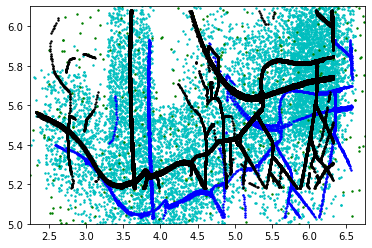

In [31]:
col_dic = {0:'k',1:'r',2:'b',4:'g',8:'c',16:'y',32:'k'}
for ind in tqdm(range(len(X)-1,-1,-1)):
    plt.scatter(X[ind,:,0],X[ind,:,1],color=col_dic[Y[ind]],s=2)
plt.xlim(2.25,6.75)
plt.ylim(5,6.1)
plt.show()

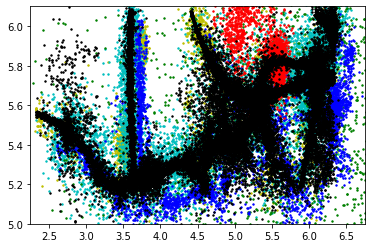

In [32]:
col_dic = {0:'k',1:'r',2:'b',4:'g',8:'c',16:'y',32:'k'}
for ind in tqdm(range(len(X)-1,-1,-1)):
    plt.scatter(y_pred[ind,:,0],y_pred[ind,:,1],color=col_dic[Y[ind]],s=2)
plt.xlim(2.25,6.75)
plt.ylim(5,6.1)
plt.show()

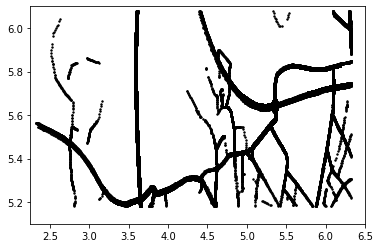

In [33]:
col_dic = {0:'k',1:'r',2:'b',4:'g',8:'c',16:'y',32:'k'}
for ind in tqdm(range(len(X))):
    if(Y[ind]!=0):
        continue
    plt.scatter(X[ind,:,0],X[ind,:,1],color=col_dic[Y[ind]],s=2)
plt.xlim(2.25,6.5)
plt.ylim(5.1,6.1)
plt.show()

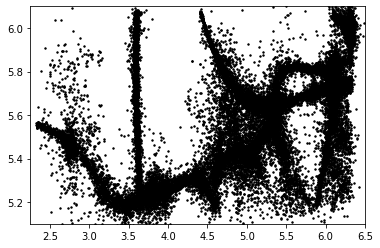

In [34]:
col_dic = {0:'k',1:'r',2:'b',4:'g',8:'c',16:'y',32:'k'}
for ind in tqdm(range(len(X))):
    if(Y[ind]!=0):
        continue
    plt.scatter(y_pred[ind,:,0],y_pred[ind,:,1],color=col_dic[Y[ind]],s=2)
plt.xlim(2.25,6.5)
plt.ylim(5.1,6.1)
plt.show()

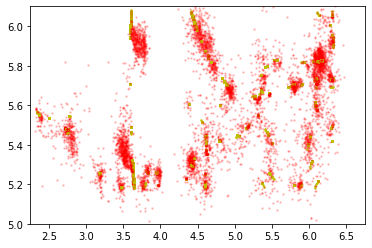

In [35]:
col_dic = {0:'k',1:'r',2:'b',4:'g',8:'c',16:'y',32:'k'}
for ind in tqdm(range(len(X))):
    if(Y[ind]!=16):
        continue
    # if(np.array_equal(X[ind][-1],np.zeros(4))):
    #     continue
    plt.scatter(X[ind,:,0],X[ind,:,1],color=col_dic[Y[ind]],s=2)
    plt.scatter(y_pred[ind,:,0],y_pred[ind,:,1],color='r',s=2,alpha=0.2)
plt.xlim(2.25,6.75)
plt.ylim(5,6.1)
plt.show()

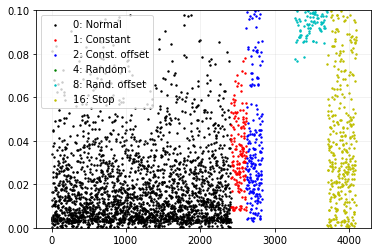

In [36]:
col_dic = {0:'k',1:'r',2:'b',4:'g',8:'c',16:'y'}
labels = ['0: Normal','1: Constant','2: Const. offset','4: Random','8: Rand. offset','16: Stop']
ctr = 0
for i in tqdm(range(len(X))):
    if(i==0 or Y[i]!=Y[i-1]):
        lbl = labels[ctr]
        ctr+=1
    plt.scatter(i,MAE(X[i],y_pred[i]),s=2,color=col_dic[Y[i]],label=lbl)
    lbl = None
plt.legend()
plt.grid(alpha=0.2)
plt.ylim(0,0.1)
plt.show()

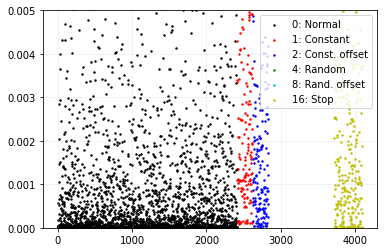

In [37]:
col_dic = {0:'k',1:'r',2:'b',4:'g',8:'c',16:'y'}
labels = ['0: Normal','1: Constant','2: Const. offset','4: Random','8: Rand. offset','16: Stop']
ctr = 0
for i in tqdm(range(len(X))):
    if(i==0 or Y[i]!=Y[i-1]):
        lbl = labels[ctr]
        ctr+=1
    plt.scatter(i,MSE(X[i],y_pred[i]),s=2,color=col_dic[Y[i]],label=lbl)
    lbl = None
plt.legend()
plt.ylim(0,0.005)
plt.grid(alpha=0.2)
plt.show()

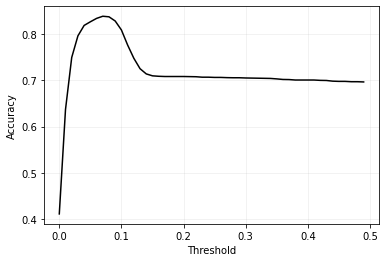

In [38]:
ln = 50
res = 100.
st = 0
acc = [0 for i in range(ln)]
for i in tqdm(range(ln)):
    threshold = st+i/res
    for j in range(len(X)):
        mae = MAE(X[j],y_pred[j])
        if(mae<threshold and Y[j]==0):
            acc[i]+=1./len(X)
        elif(mae>threshold and Y[j]!=0):
            acc[i]+=1./len(X)
plt.plot([st+i/res for i in range(ln)],acc,color='k')
plt.grid(alpha=0.2)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.show()

In [39]:
max(acc)

0.837646484375

In [40]:
np.argmax(acc)

7

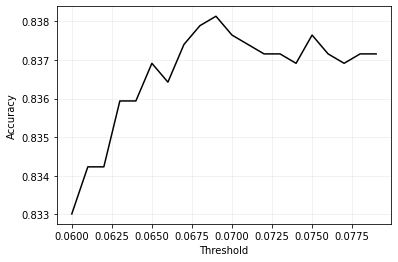

In [41]:
ln = 20
res = 1000.
st = 0.06
acc = [0 for i in range(ln)]
for i in tqdm(range(ln)):
    threshold = st+i/res
    for j in range(len(X)):
        mae = MAE(X[j],y_pred[j])
        if(mae<threshold and Y[j]==0):
            acc[i]+=1./len(X)
        elif(mae>threshold and Y[j]!=0):
            acc[i]+=1./len(X)
plt.plot([st+i/res for i in range(ln)],acc,color='k')
plt.grid(alpha=0.2)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.show()

In [42]:
max(acc)

0.838134765625

In [43]:
np.argmax(acc)

9

In [44]:
cm = np.zeros((2,2))
freq = {}
wrong_dic = {}
dic = {0:0,1:1,2:1,4:1,8:1,16:1}
threshold = st+(np.argmax(acc)/res)
for j in range(len(X)):
    if(Y[j] in freq):
        freq[Y[j]]+=1
    else:
        freq[Y[j]] = 1
    mae = MAE(X[j],y_pred[j])
    p = 1 if mae>threshold else 0
    if(p==0 and Y[j]!=0):
        if(Y[j] in wrong_dic):
            wrong_dic[Y[j]]+=1
        else:
            wrong_dic[Y[j]] = 1
    if(p!=0 and Y[j]==0):
        if(0 in wrong_dic):
            wrong_dic[0]+=1
        else:
            wrong_dic[0] = 1
    cm[dic[Y[j]]][p]+=1
print(cm)
print(freq)
print(wrong_dic)
rec_dic = {}
for key,val in freq.items():
    if(key in wrong_dic):
        rec_dic[key] = (val-wrong_dic[key])/val
    else:
        rec_dic[key] = 1.
print(rec_dic)

[[2343.   67.]
 [ 596. 1090.]]
{0: 2410, 1: 210, 2: 213, 4: 438, 8: 440, 16: 385}
{0: 67, 1: 151, 2: 170, 16: 275}
{0: 0.9721991701244813, 1: 0.28095238095238095, 2: 0.20187793427230047, 4: 1.0, 8: 1.0, 16: 0.2857142857142857}


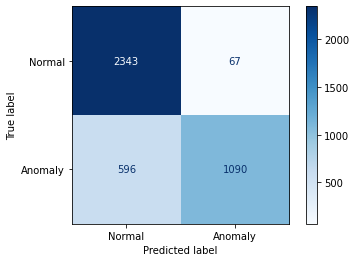

In [45]:
cm_disp = ConfusionMatrixDisplay(cm,['Normal','Anomaly'])
cm_disp.plot(cmap='Blues',values_format='.0f')
plt.show()

In [46]:
acc = (cm[0][0]+cm[1][1])/np.sum(cm)
print(acc)

0.838134765625


In [47]:
prec = [0 for i in range(2)]
rec = [0 for i in range(2)]
f1 = [0 for i in range(2)]
for i in range(2):
    prec[i] = cm[i][i]/np.sum(cm[:,i])
    rec[i] = cm[i][i]/np.sum(cm[i])
    f1[i] = prec[i]*rec[i]*2/(prec[i]+rec[i])
print(prec)
print(rec)
print(f1)

[0.7972099353521606, 0.9420916162489196]
[0.9721991701244813, 0.6465005931198102]
[0.876051598429613, 0.7667956384101302]


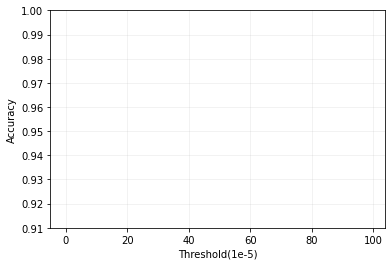

In [48]:
acc = [0 for i in range(100)]
for i in tqdm(range(100)):
    threshold = i/100000.
    for j in range(len(X)):
        mae = MSE(X[j],y_pred[j])
        if(mae<threshold and Y[j]==0):
            acc[i]+=1./len(X)
        elif(mae>threshold and Y[j]!=0):
            acc[i]+=1./len(X)
plt.plot([i for i in range(100)],acc,color='k')
plt.grid(alpha=0.2)
plt.ylim(0.91,1)
plt.xlabel('Threshold(1e-5)')
plt.ylabel('Accuracy')
plt.show()

In [49]:
max(acc)

0.757568359375

In [50]:
np.argmax(acc)

98

In [51]:
cm = np.zeros((2,2))
freq = {}
wrong_dic = {}
dic = {0:0,1:1,2:1,4:1,8:1,16:1}
threshold = 0.00036
for j in range(len(X)):
    if(Y[j] in freq):
        freq[Y[j]]+=1
    else:
        freq[Y[j]] = 1
    mse = MSE(X[j],y_pred[j])
    p = 1 if mse>threshold else 0
    if(p==0 and Y[j]!=0):
        if(Y[j] in wrong_dic):
            wrong_dic[Y[j]]+=1
        else:
            wrong_dic[Y[j]] = 1
    if(p!=0 and Y[j]==0):
        if(0 in wrong_dic):
            wrong_dic[0]+=1
        else:
            wrong_dic[0] = 1
    cm[dic[Y[j]]][p]+=1
print(cm)
print(freq)
print(wrong_dic)
rec_dic = {}
for key,val in freq.items():
    if(key in wrong_dic):
        rec_dic[key] = (val-wrong_dic[key])/val
    else:
        rec_dic[key] = 1.
print(rec_dic)

[[1215. 1195.]
 [ 110. 1576.]]
{0: 2410, 1: 210, 2: 213, 4: 438, 8: 440, 16: 385}
{0: 1195, 1: 17, 2: 30, 16: 63}
{0: 0.504149377593361, 1: 0.919047619047619, 2: 0.8591549295774648, 4: 1.0, 8: 1.0, 16: 0.8363636363636363}


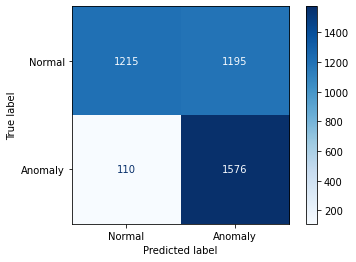

In [52]:
cm_disp = ConfusionMatrixDisplay(cm,['Normal','Anomaly'])
cm_disp.plot(cmap='Blues',values_format='.0f')
plt.show()

In [53]:
acc = (cm[0][0]+cm[1][1])/np.sum(cm)
print(acc)

0.681396484375


In [54]:
prec = [0 for i in range(2)]
rec = [0 for i in range(2)]
f1 = [0 for i in range(2)]
for i in range(2):
    prec[i] = cm[i][i]/np.sum(cm[:,i])
    rec[i] = cm[i][i]/np.sum(cm[i])
    f1[i] = prec[i]*rec[i]*2/(prec[i]+rec[i])
print(prec)
print(rec)
print(f1)

[0.9169811320754717, 0.5687477444965716]
[0.504149377593361, 0.9347568208778173]
[0.6506024096385542, 0.7072021539151895]


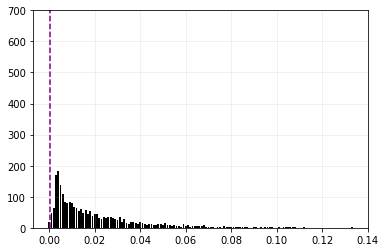

In [55]:
freq = {}
for i in tqdm(range(len(X))):
    if(Y[i]==0):
        val = round(MAE(X[i],y_pred[i]),3)
        if(val not in freq):
            freq[val] = 1
        else:
            freq[val]+=1
for key,val in freq.items():
    plt.bar(key,val,color='k',width=0.0008)
plt.vlines(x=threshold,ymin=0,ymax=700,linestyles='dashed',color='purple')
plt.ylim(0,700)
plt.grid(alpha=0.2)
plt.show()

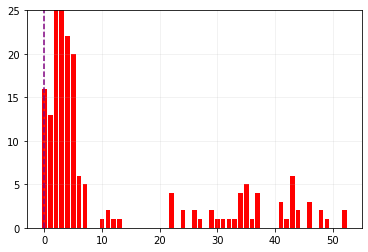

In [56]:
freq = {}
for i in tqdm(range(len(X))):
    if(Y[i]==1):
        val = int(MAE(X[i],y_pred[i])*100)
        if(val not in freq):
            freq[val] = 1
        else:
            freq[val]+=1
for key,val in freq.items():
    plt.bar(key,val,color='r')
plt.vlines(x=threshold,ymin=0,ymax=25,linestyles='dashed',color='purple')
plt.ylim(0,25)
plt.grid(alpha=0.2)
plt.show()

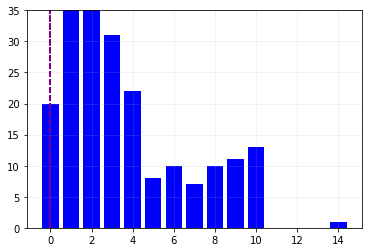

In [57]:
freq = {}
for i in tqdm(range(len(X))):
    if(Y[i]==2):
        val = int(MAE(X[i],y_pred[i])*100)
        if(val not in freq):
            freq[val] = 1
        else:
            freq[val]+=1
for key,val in freq.items():
    plt.bar(key,val,color='b')
    plt.vlines(x=threshold,ymin=0,ymax=35,linestyles='dashed',color='purple')
plt.ylim(0,35)
plt.grid(alpha=0.2)
plt.show()

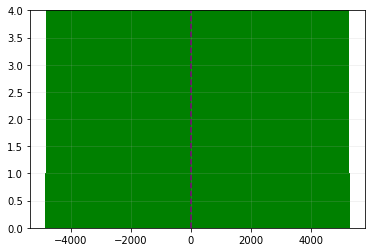

In [58]:
freq = {}
for i in tqdm(range(len(X))):
    if(Y[i]==4):
        val = int(MAE(X[i],y_pred[i])*100)
        if(val not in freq):
            freq[val] = 1
        else:
            freq[val]+=1
for key,val in freq.items():
    plt.bar(key,val,color='g',width=10000)
plt.vlines(x=threshold,ymin=0,ymax=4,linestyles='dashed',color='purple')
plt.ylim(0,4)
plt.grid(alpha=0.2)
plt.show()

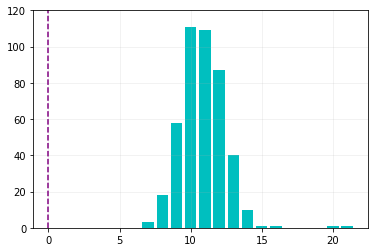

In [59]:
freq = {}
for i in tqdm(range(len(X))):
    if(Y[i]==8):
        val = int(MAE(X[i],y_pred[i])*100)
        if(val not in freq):
            freq[val] = 1
        else:
            freq[val]+=1
for key,val in freq.items():
    plt.bar(key,val,color='c')
plt.vlines(x=threshold,ymin=0,ymax=120,linestyles='dashed',color='purple')
plt.ylim(0,120)
plt.grid(alpha=0.2)
plt.show()

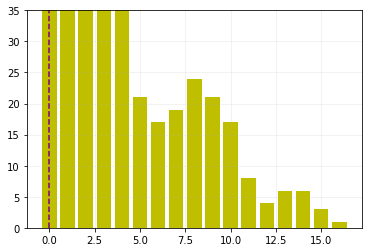

In [60]:
freq = {}
for i in tqdm(range(len(X))):
    if(Y[i]==16):
        val = int(MAE(X[i],y_pred[i])*100)
        if(val not in freq):
            freq[val] = 1
        else:
            freq[val]+=1
for key,val in freq.items():
    plt.bar(key,val,color='y')
plt.vlines(x=threshold,ymin=0,ymax=35,linestyles='dashed',color='purple')
plt.ylim(0,35)
plt.grid(alpha=0.2)
plt.show()

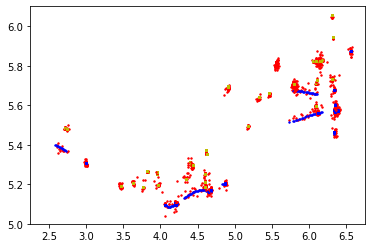

In [61]:
col_dic = {0:'k',1:'r',2:'b',4:'g',8:'c',16:'y',32:'k'}
for ind in tqdm(range(len(X))):
    if(Y[ind]==0):
        continue
    if(MAE(X[ind],y_pred[ind])<0.013):
        plt.scatter(y_pred[ind,:,0],y_pred[ind,:,1],color='r',s=2)
        plt.scatter(X[ind,:,0],X[ind,:,1],color=col_dic[Y[ind]],s=2)
plt.xlim(2.25,6.75)
plt.ylim(5,6.1)
plt.show()

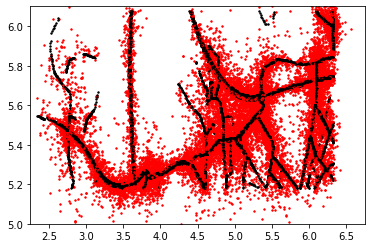

In [62]:
col_dic = {0:'k',1:'r',2:'b',4:'g',8:'c',16:'y',32:'k'}
for ind in tqdm(range(len(X))):
    if(Y[ind]!=0):
        continue
    if(MAE(X[ind],y_pred[ind])>0.013):
        plt.scatter(y_pred[ind,:,0],y_pred[ind,:,1],color='r',s=2)
        plt.scatter(X[ind,:,0],X[ind,:,1],color=col_dic[Y[ind]],s=2)
plt.xlim(2.25,6.75)
plt.ylim(5,6.1)
plt.show()